In [1]:
from convergence_helpers import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gaussian_mixture_grid import GaussianMixtureGrid
import numpy as np
from figure_grid import *

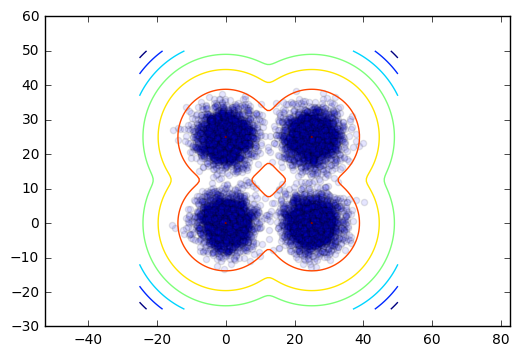

In [2]:
gr2d = GaussianMixtureGrid(2, 2, 25, 4)
s = np.linspace(-25,50,100)
X,Y = np.meshgrid(s,s)
Z = [[gr2d.logp([x,y]) for x in s] for y in s]
plt.contour(X,Y,Z)
plt.scatter(*gr2d.sample(10000).T, alpha=0.1)
plt.axis('equal')
plt.show()

In [51]:
I = np.identity(2)
nodes1 = np.random.multivariate_normal([0,0],I, size=20)
nodes2 = np.random.multivariate_normal([6,3],2*I, size=30)
nodes3 = np.random.multivariate_normal([1,-4], 0.5*I, size=15)
#nodes2 = np.random.multivariate_normal(6,2*I, size=10)

edges = []

import itertools
for i, (nodes, center, sd) in enumerate(([nodes1, np.array([0,0]), 1], [nodes2, np.array([6,3]), 2], [nodes3, np.array([1,-2]), 0.5])):
  for n1, n2 in itertools.combinations(nodes, 2):
    dist = min([sum((n1-center)**2), sum((n2-center)**2)])
    if dist < np.random.uniform():
      edges.append([n1, n2, i])

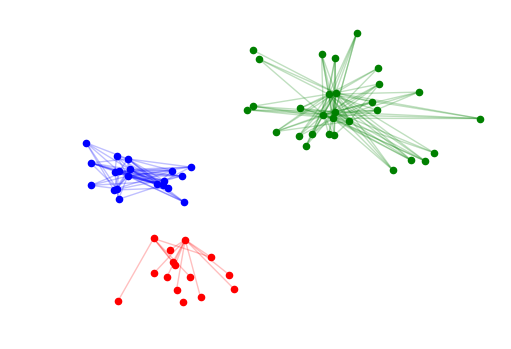

In [80]:
plt.scatter(*nodes1.T, color='blue')
plt.scatter(*nodes2.T, color='green')
plt.scatter(*nodes3.T, color='red')

for n1, n2, i in edges:
  plt.plot([n1[0],n2[0]], [n1[1],n2[1]], color=['blue','green','red'][i], alpha=0.25)

plt.axis('off')
#plt.title(r'$1-\epsilon$', fontsize=16)
plt.ylim(-6,7)
plt.xlim(-3,11)

plt.show()

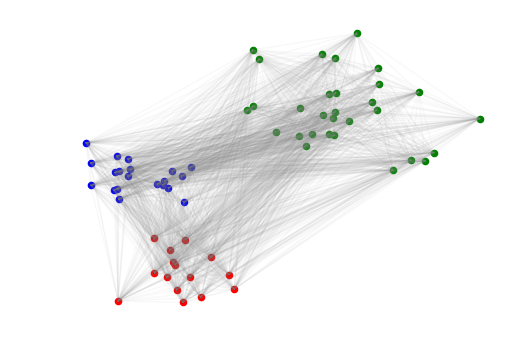

In [81]:
plt.scatter(*nodes1.T, color='blue')
plt.scatter(*nodes2.T, color='green')
plt.scatter(*nodes3.T, color='red')

for n1, n2 in itertools.combinations(np.vstack((nodes1,nodes2,nodes3)), 2):
  plt.plot([n1[0],n2[0]], [n1[1],n2[1]], color='gray', alpha=0.05)

plt.axis('off')
#plt.title(r'$\epsilon$', fontsize=16)
plt.ylim(-6,7)
plt.xlim(-3,11)

plt.show()

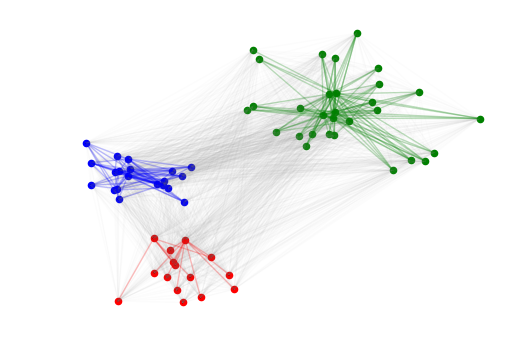

In [78]:
plt.scatter(*nodes1.T, color='blue')
plt.scatter(*nodes2.T, color='green')
plt.scatter(*nodes3.T, color='red')

for n1, n2 in itertools.combinations(np.vstack((nodes1,nodes2,nodes3)), 2):
  plt.plot([n1[0],n2[0]], [n1[1],n2[1]], color='gray', alpha=0.025)
for n1, n2, i in edges:
  plt.plot([n1[0],n2[0]], [n1[1],n2[1]], color=['blue','green','red'][i], alpha=0.25)
  
plt.axis('off')
#plt.title(r'Total', fontsize=16)
plt.ylim(-6,7)
plt.xlim(-3,11)

plt.show()